In [1]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Files names samples
filenames = [
    "GCA_000013265.1",
    "GCA_000008865.2",
    "GCA_030271835.1",
    "GCA_000005845.2",
    "GCA_000069965.1"
]

# initialization of a matrix full of zeros
num_files = len(filenames)
jaccard_matrix = np.zeros((num_files, num_files))

# Jaccard indexes previously calculated
jaccard_indices = {
    ("GCA_000013265.1", "GCA_000008865.2"): 0.3048,
    ("GCA_000013265.1", "GCA_030271835.1"): 0.0008,
    ("GCA_000013265.1", "GCA_000005845.2"): 0.3361,
    ("GCA_000013265.1", "GCA_000069965.1"): 0.0008,
    ("GCA_000008865.2", "GCA_030271835.1"): 0.0008,
    ("GCA_000008865.2", "GCA_000005845.2"): 0.4460,
    ("GCA_000008865.2", "GCA_000069965.1"): 0.0008,
    ("GCA_030271835.1", "GCA_000005845.2"): 0.0009,
    ("GCA_030271835.1", "GCA_000069965.1"): 0.0262,
    ("GCA_000005845.2", "GCA_000069965.1"): 0.0009
}

# fill the matrix with Jaccard indexes
for (fileA, fileB), j_index in jaccard_indices.items():
    i = filenames.index(fileA)
    j = filenames.index(fileB)
    jaccard_matrix[i, j] = j_index
    jaccard_matrix[j, i] = j_index  # symetric matrix

# dataframe
jaccard_df = pd.DataFrame(jaccard_matrix, index=filenames, columns=filenames)
print("Matrice des indices de Jaccard :")
print(jaccard_df)

# dataframe in a csv file with tabulation
jaccard_df.to_csv('jaccard_matrix.tsv', sep='\t')




Matrice des indices de Jaccard :
                 GCA_000013265.1  GCA_000008865.2  GCA_030271835.1  \
GCA_000013265.1           0.0000           0.3048           0.0008   
GCA_000008865.2           0.3048           0.0000           0.0008   
GCA_030271835.1           0.0008           0.0008           0.0000   
GCA_000005845.2           0.3361           0.4460           0.0009   
GCA_000069965.1           0.0008           0.0008           0.0262   

                 GCA_000005845.2  GCA_000069965.1  
GCA_000013265.1           0.3361           0.0008  
GCA_000008865.2           0.4460           0.0008  
GCA_030271835.1           0.0009           0.0262  
GCA_000005845.2           0.0000           0.0009  
GCA_000069965.1           0.0009           0.0000  


Jaccard Matrix loaded from 'jaccard_matrix.tsv':
                 GCA_000013265.1  GCA_000008865.2  GCA_030271835.1  \
GCA_000013265.1           0.0000           0.3048           0.0008   
GCA_000008865.2           0.3048           0.0000           0.0008   
GCA_030271835.1           0.0008           0.0008           0.0000   
GCA_000005845.2           0.3361           0.4460           0.0009   
GCA_000069965.1           0.0008           0.0008           0.0262   

                 GCA_000005845.2  GCA_000069965.1  
GCA_000013265.1           0.3361           0.0008  
GCA_000008865.2           0.4460           0.0008  
GCA_030271835.1           0.0009           0.0262  
GCA_000005845.2           0.0000           0.0009  
GCA_000069965.1           0.0009           0.0000  
Distance matrix computed successfully
Hierarchical clustering completed


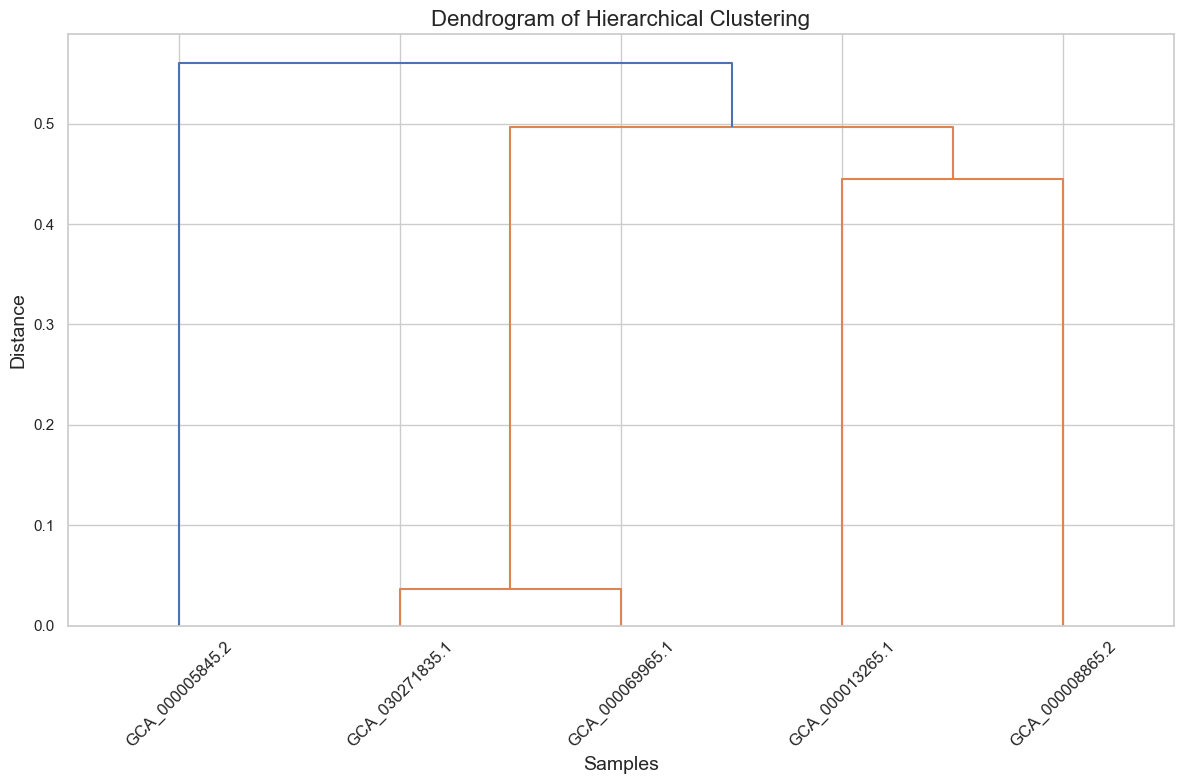

Dendrogram plotted successfully


In [7]:
# Configure Seaborn for better aesthetics
sns.set(style='whitegrid', context='notebook')

def plot_dendrogram(jaccard_df):
    """Plot the dendrogram based on the Jaccard matrix."""
    # Calculate the distance matrix
    distance_matrix = 1 - jaccard_df  # Invert values for distance
    print("Distance matrix computed successfully")

    # Perform hierarchical clustering
    linkage_matrix = sch.linkage(distance_matrix, method='average')
    print("Hierarchical clustering completed")

    # Plot the dendrogram
    plt.figure(figsize=(12, 8))  # Larger figure size for better readability
    dendrogram = sch.dendrogram(linkage_matrix, labels=jaccard_df.index, leaf_rotation=45, leaf_font_size=12, color_threshold=0.5)

    # Customize the plot
    plt.title("Dendrogram of Hierarchical Clustering", fontsize=16)
    plt.xlabel("Samples", fontsize=14)
    plt.ylabel("Distance", fontsize=14)
    plt.grid(True)  # Add grid for better readability
    plt.tight_layout()  # Adjust layout to fit everything nicely
    plt.show()
    print("Dendrogram plotted successfully")

if __name__ == "__main__":
    # Load the Jaccard matrix from the CSV file
    jaccard_df = pd.read_csv('jaccard_matrix.tsv', sep='\t', index_col=0)
    print("Jaccard Matrix loaded from 'jaccard_matrix.tsv':")
    print(jaccard_df)

    # Plot the dendrogram
    plot_dendrogram(jaccard_df)
